In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!git clone https://github.com/MahyarFardin/Neural-Networks.git

Cloning into 'Neural-Networks'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 112 (delta 24), reused 70 (delta 13), pack-reused 0
Receiving objects: 100% (112/112), 2.92 MiB | 11.49 MiB/s, done.
Resolving deltas: 100% (24/24), done.


In [89]:
df=pd.read_csv("/content/Neural-Networks/ANN/New folder/Life Expectancy Data.csv")

In [4]:
df.head()

Country  Year  ... Income composition of resources  Schooling
0  Afghanistan  2015  ...                           0.479       10.1
1  Afghanistan  2014  ...                           0.476       10.0
2  Afghanistan  2013  ...                           0.470        9.9
3  Afghanistan  2012  ...                           0.463        9.8
4  Afghanistan  2011  ...                           0.454        9.5

[5 rows x 22 columns]

# Feature engineering and preprocessing

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
label_encoder=LabelEncoder()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
df.describe()

Year  ...    Schooling
count  2938.000000  ...  2775.000000
mean   2007.518720  ...    11.992793
std       4.613841  ...     3.358920
min    2000.000000  ...     0.000000
25%    2004.000000  ...    10.100000
50%    2008.000000  ...    12.300000
75%    2012.000000  ...    14.300000
max    2015.000000  ...    20.700000

[8 rows x 20 columns]

**Transforming to numeric**

In [9]:
len(list(df["Country"].unique()))

193

In [90]:
df["Country"]=label_encoder.fit_transform(df["Country"])

In [11]:
df["Year"].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000])

In [91]:
df["Year"]=label_encoder.fit_transform(df["Year"])

In [13]:
df["Status"].unique()

array(['Developing', 'Developed'], dtype=object)

In [92]:
df["Status"]=label_encoder.fit_transform(df["Status"])

**Relations of features**

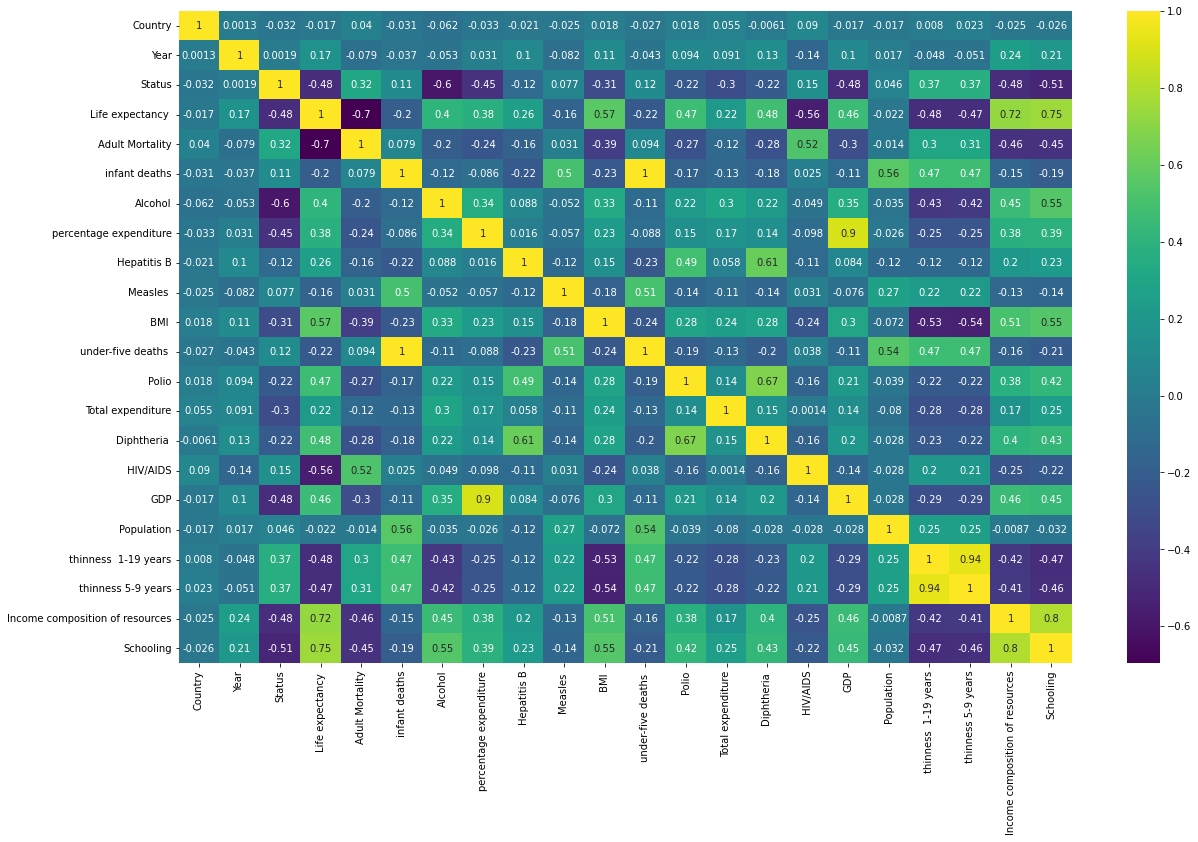

In [15]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,cmap="viridis")

Removing high correlation features (90%<corr)

In [93]:
df=df.drop([' thinness  1-19 years',"under-five deaths ","percentage expenditure"],axis=1)

In [94]:
corr=pd.DataFrame(df.corr())

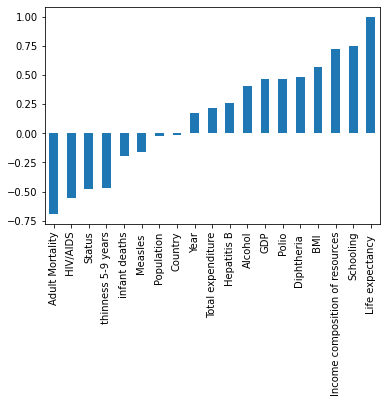

In [95]:
corr["Life expectancy "].sort_values().plot(kind="bar")

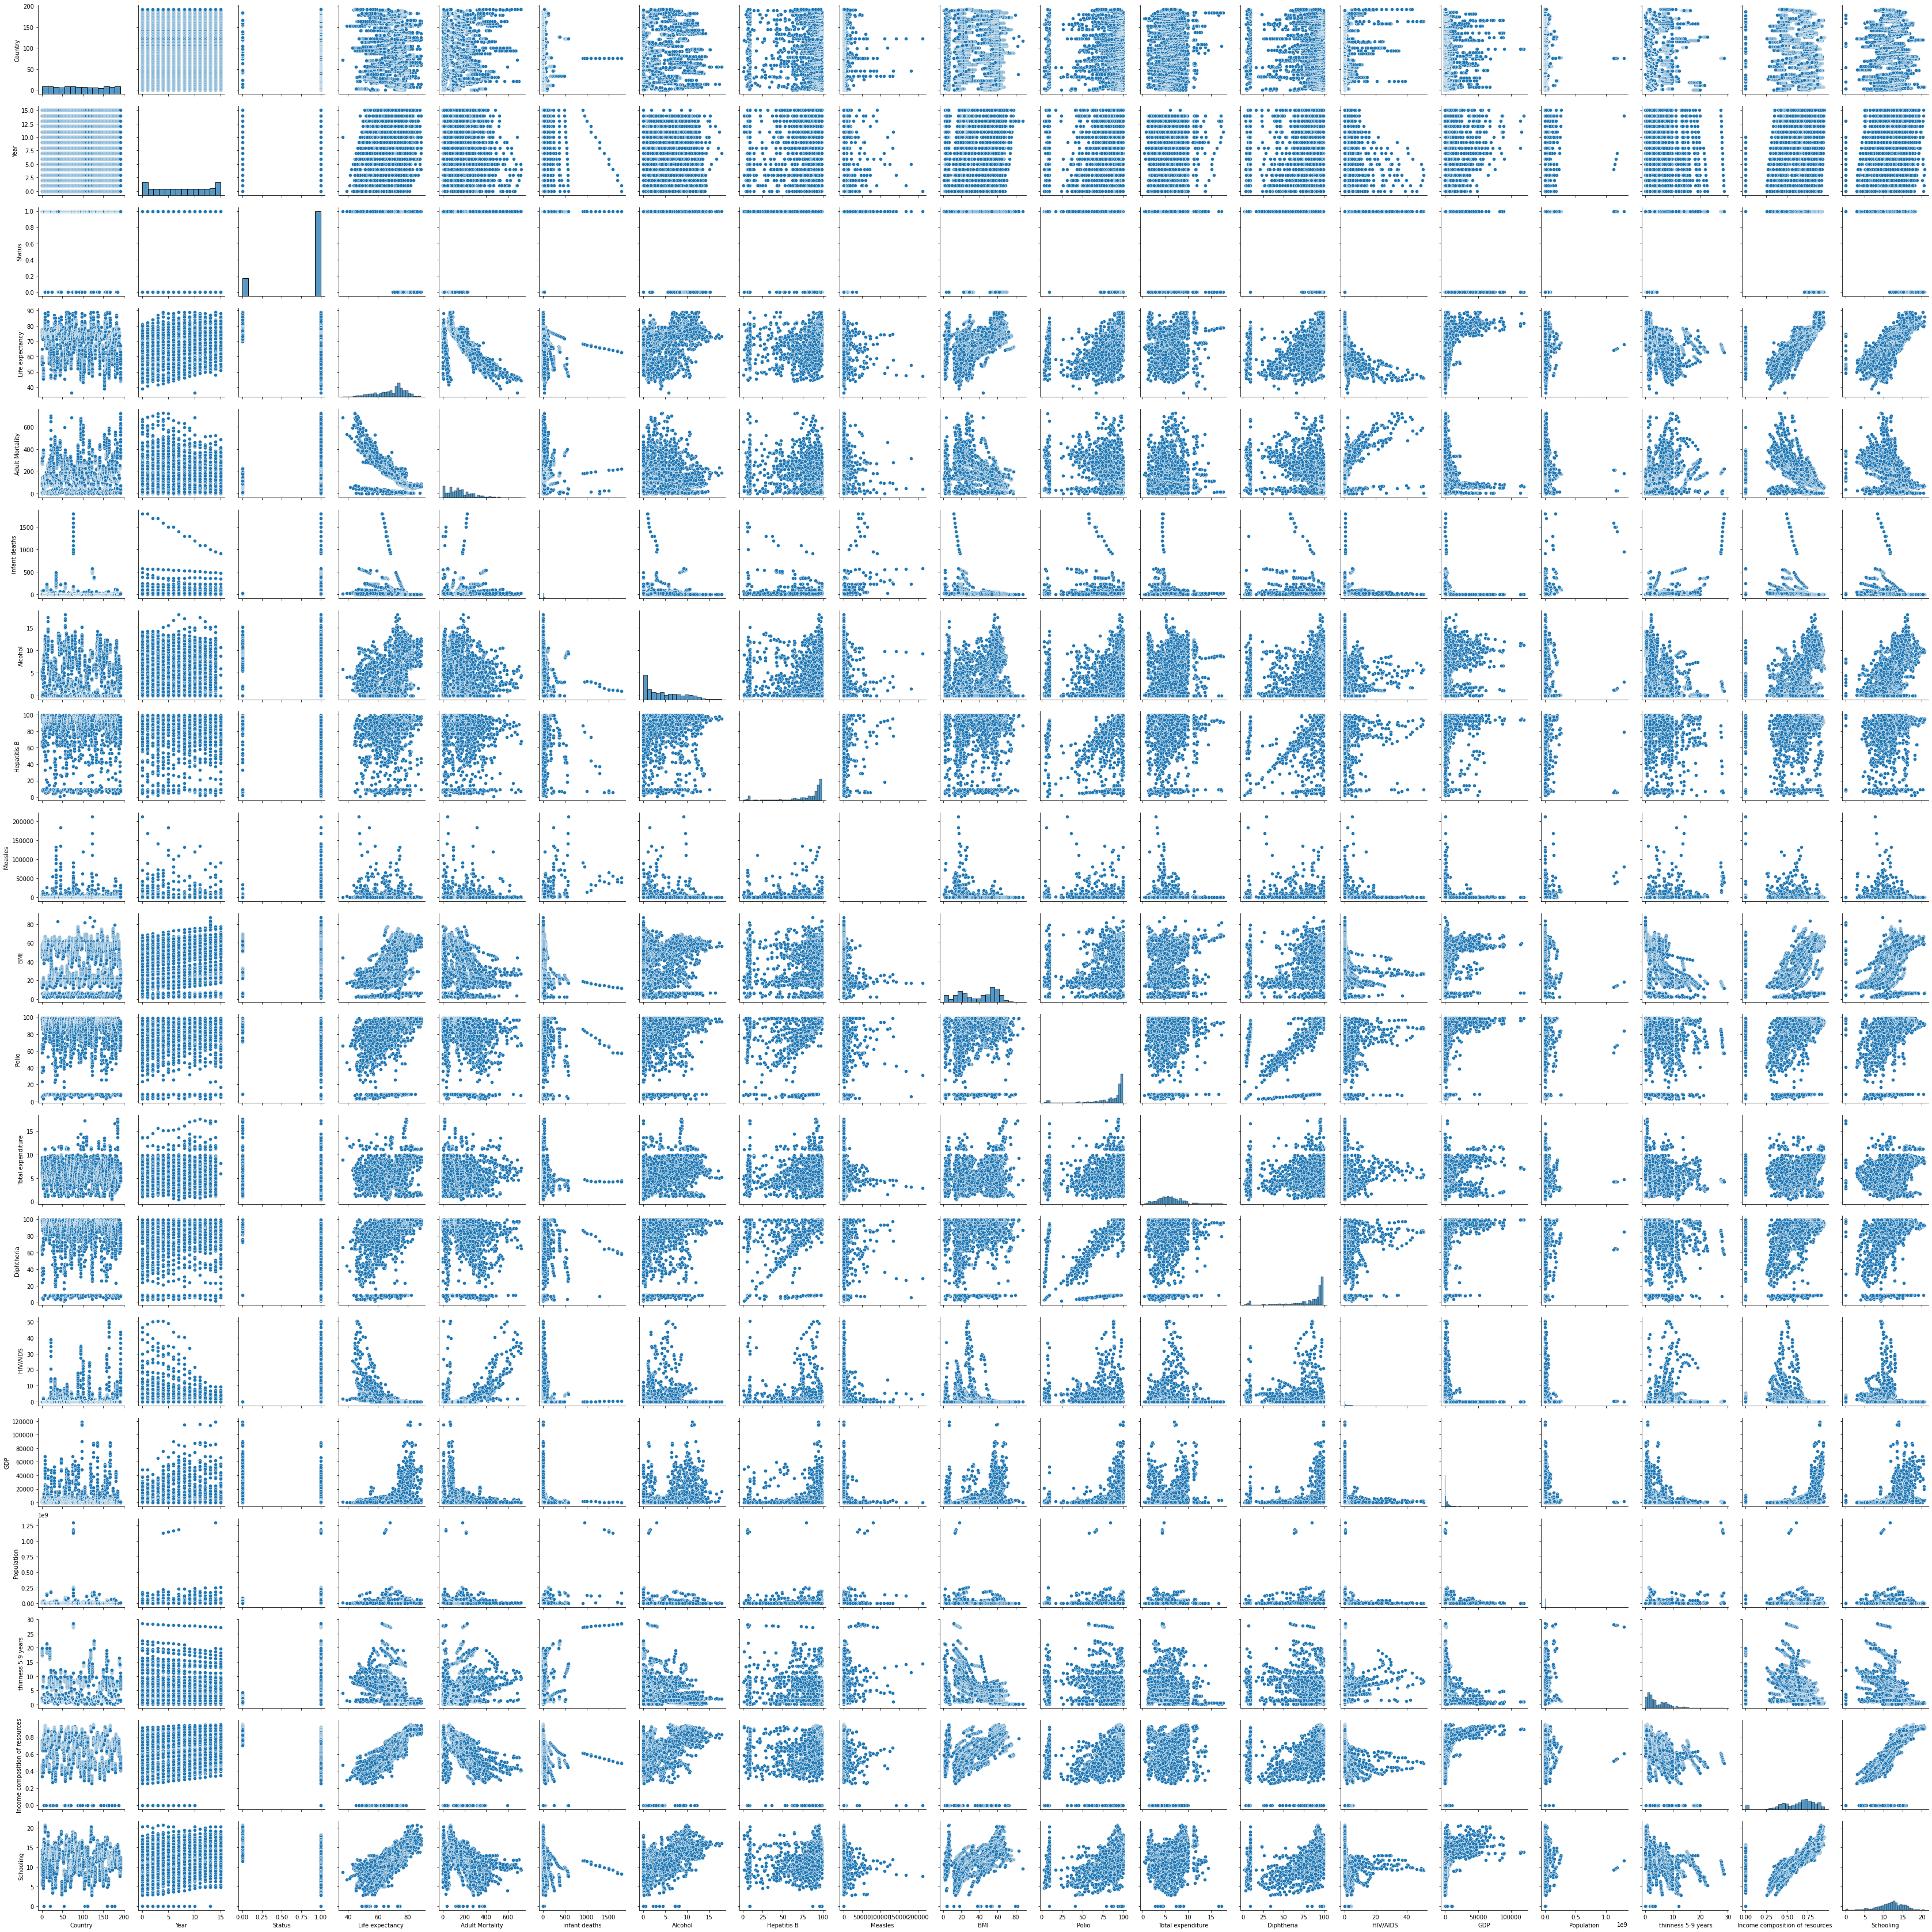

In [19]:
sns.pairplot(df)

plot is a total disater :) lets remove outliers using the histogram of the 8th column

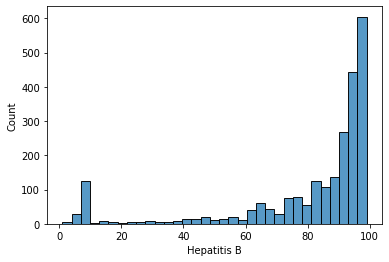

In [20]:
sns.histplot(df['Hepatitis B'])

In [96]:
df=df[df['Hepatitis B']>60]

lets draw another pair plot and check the results

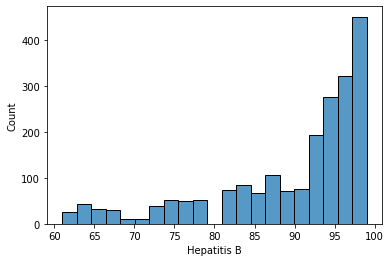

In [22]:
sns.histplot(df['Hepatitis B'])

In [24]:
# sns.pairplot(df)
# This cell was time consuming so I did not run it

There is one point remaining and I can handel it 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


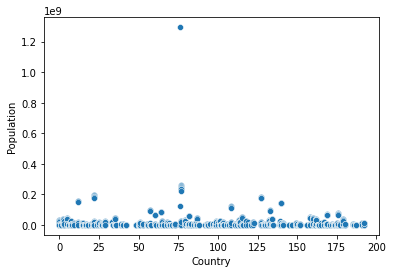

In [25]:
sns.scatterplot(df["Country"],df["Population"])

In [97]:
df=df[df["Population"]<600_000_000]

**Handeling missing values**

In [100]:
df.shape

(1533, 19)

In [98]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      1
Adult Mortality                      1
infant deaths                        0
Alcohol                            112
Hepatitis B                          0
Measles                              0
 BMI                                 9
Polio                                0
Total expenditure                  114
Diphtheria                           0
 HIV/AIDS                            0
GDP                                 10
Population                           0
 thinness 5-9 years                  9
Income composition of resources      0
Schooling                            0
dtype: int64

In [102]:
df=df.dropna()

In [103]:
df.shape

(1404, 19)

Dataset is clean now lets make the model

In [76]:
from sklearn.model_selection import cross_val_score

In [104]:
x=df.drop('Life expectancy ',axis=1).values
y=df['Life expectancy '].values

In [152]:
from sklearn.preprocessing import MinMaxScaler

In [155]:
mms=MinMaxScaler()
x=mms.fit_transform(x)

In [156]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

# Model

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [81]:
es=EarlyStopping(patience=3)

In [162]:
model=Sequential()

# Input layer
model.add(Dense(32,activation="relu"))

# Hidden layer 1
model.add(Dense(16,activation="relu"))

# Hidden layer 2
model.add(Dense(8,activation="relu"))

# Output layer
model.add(Dense(1))

model.compile(loss="mse")

In [163]:
model.fit(xtrain,ytrain,epochs=3000,callbacks=[es],validation_data=(xtest,ytest))

Epoch 1/3000
33/33 [==============================] - 2s 12ms/step - loss: 4798.0166 - val_loss: 4644.4414
Epoch 2/3000
33/33 [==============================] - 0s 6ms/step - loss: 4408.3682 - val_loss: 4054.5762
Epoch 3/3000
33/33 [==============================] - 0s 6ms/step - loss: 3564.3826 - val_loss: 2936.4771
Epoch 4/3000
33/33 [==============================] - 0s 4ms/step - loss: 2229.7441 - val_loss: 1453.6637
Epoch 5/3000
33/33 [==============================] - 0s 6ms/step - loss: 819.6119 - val_loss: 302.9193
Epoch 6/3000
33/33 [==============================] - 0s 6ms/step - loss: 138.1445 - val_loss: 96.2657
Epoch 7/3000
33/33 [==============================] - 0s 6ms/step - loss: 80.6724 - val_loss: 89.6055
Epoch 8/3000
33/33 [==============================] - 0s 7ms/step - loss: 75.3016 - val_loss: 83.2916
Epoch 9/3000
33/33 [==============================] - 0s 5ms/step - loss: 69.1232 - val_loss: 79.4616
Epoch 10/3000
33/33 [==============================] - 0s 6ms/

In [164]:
res=pd.DataFrame(model.history.history)

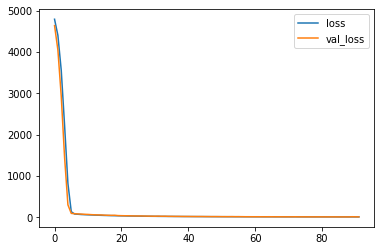

In [166]:
res.plot()

In [167]:
prediction=model.predict(xtest)

In [170]:
prediction=prediction.reshape(351,)

In [171]:
from sklearn import metrics

In [173]:
metrics.mean_squared_error(prediction,ytest)**.5

3.506872506306595

In [174]:
df.describe()["Life expectancy "]

count    1404.000000
mean       69.635185
std         8.546164
min        44.000000
25%        65.000000
50%        72.000000
75%        75.000000
max        89.000000
Name: Life expectancy , dtype: float64

In [176]:
3/70

0.04285714285714286

well I got 94 percent accuracy

lets add dropouts and retest the model

In [178]:
model=Sequential()

# Input layer
model.add(Dense(32,activation="relu"))
model.add(Dropout(.2))

# Hidden layer 1
model.add(Dense(16,activation="relu"))
model.add(Dropout(.2))

# Hidden layer 2
model.add(Dense(8,activation="relu"))
model.add(Dropout(.2))

# Output layer
model.add(Dense(1))

model.compile(loss="mse")

In [179]:
model.fit(xtrain,ytrain,epochs=3000,callbacks=[es],validation_data=(xtest,ytest))

Epoch 1/3000
33/33 [==============================] - 2s 13ms/step - loss: 4695.5435 - val_loss: 4400.3174
Epoch 2/3000
33/33 [==============================] - 0s 9ms/step - loss: 4026.4307 - val_loss: 3545.6987
Epoch 3/3000
33/33 [==============================] - 0s 7ms/step - loss: 3008.2764 - val_loss: 2318.8984
Epoch 4/3000
33/33 [==============================] - 0s 7ms/step - loss: 1785.0173 - val_loss: 971.9509
Epoch 5/3000
33/33 [==============================] - 0s 5ms/step - loss: 764.8912 - val_loss: 238.8687
Epoch 6/3000
33/33 [==============================] - 0s 6ms/step - loss: 534.3413 - val_loss: 136.2573
Epoch 7/3000
33/33 [==============================] - 0s 5ms/step - loss: 557.9126 - val_loss: 114.6302
Epoch 8/3000
33/33 [==============================] - 0s 4ms/step - loss: 527.8369 - val_loss: 105.3128
Epoch 9/3000
33/33 [==============================] - 0s 6ms/step - loss: 515.8674 - val_loss: 99.3904
Epoch 10/3000
33/33 [==============================] - 0s

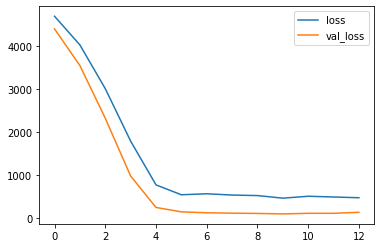

In [180]:
pd.DataFrame(model.history.history).plot()

In [181]:
prediction2=model.predict(xtest)

In [182]:
prediction2=prediction2.reshape(351,)

In [184]:
metrics.mean_squared_error(prediction2,ytest)**.5

11.211254302637295